In [1]:
fp = open("studentInfo.txt", "w")
fp.write("LEE 75 89 92 78\n")
fp.write("Park 90 76 88 83\n")
fp.write("Jung 55 99 81 88\n")
fp.write("Choi 80 67 75 91")
fp.close()

총점 반평균: 326.75

<각 과목의 평균과 최고점>

       국어: 75.00, 90

       수학: 82.75, 99

       영어: 84.00, 92

       컴: 85.00, 91

<각 학생별 평균>

       LEE: 83.5

       Park: 84.25

       Jung: 80.75

       Choi: 78.25



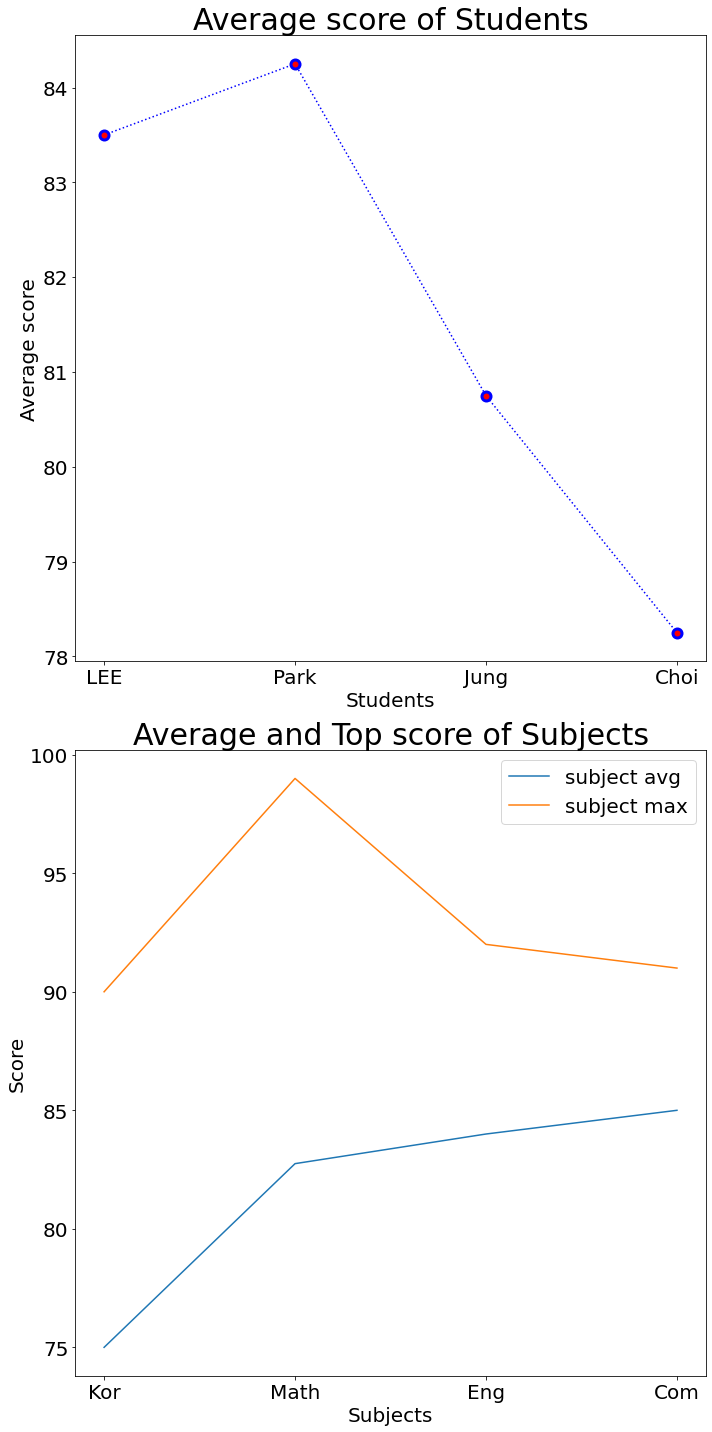

In [2]:
import numpy as np
import matplotlib.pyplot as plt

studentNames = []
subjects = ["Kor", "Math", "Eng", "Com"]
Grades = np.array([])

fp = open("studentInfo.txt", "r")
students = fp.readlines()


## Grades ndarray에 append 해주기 위해 dummy 원소를 하나 추가해줌
Grades = np.empty((1, 4), dtype=int)


## 학생들의 성적을 Grades ndarray에 저장
for student in students:
    student = student.split()
    
    name = student[0]
    studentNames.append(name)
    
    grade = np.array([list(map(int, student[1:]))])
    Grades = np.append(Grades, grade, axis=0)
    
## Grades에 append를 해주기 위해 추가한 dummy 원소를 삭제해줌
Grades = np.delete(Grades, [0, 0], axis=0)


## 학생 수를 저장하는 변수
count = len(studentNames)


############## numpy 이용하여 연산하기 ##############
                                                
## 총점의 반평균
totalAvg = np.sum(Grades)/count

## 각 과목별 평균
subjectAvg = np.sum(a=Grades,axis=0)/count

## 각 학생별 평균
studentAvg = np.sum(a=Grades,axis=1)/count

## 각 과목의 최고점
subjectMax = np.max(Grades, axis=0)

################################################



################ 총점 반평균 출력부분 ###############

print(f"총점 반평균: {totalAvg}\n")

################################################



########### 각 과목의 평균과 최고점 출력부분 ###########

print("<각 과목의 평균과 최고점>\n")
print(f"       국어: {subjectAvg[0]:.2f}, {subjectMax[0]}\n")
print(f"       수학: {subjectAvg[1]:.2f}, {subjectMax[1]}\n")
print(f"       영어: {subjectAvg[2]:.2f}, {subjectMax[2]}\n")
print(f"       컴: {subjectAvg[3]:.2f}, {subjectMax[3]}\n")


################################################


############## 각 학생별 평균 출력부분 ###############

print("<각 학생별 평균>\n")
for i, name in enumerate(studentNames):
    print(f"       {name}: {studentAvg[i]}\n")
    
################################################


## 두 개의 그래프를 그려주는 과정
fig = plt.figure(figsize=(10,20));
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(studentNames,studentAvg, "b:", marker="o", mfc="r", mew = 3, ms = 9)
ax1.set_title("Average score of Students", size = 30)
ax1.set_xlabel("Students", size = 20)
ax1.set_ylabel("Average score", size = 20)
ax1.tick_params(axis='both', which='major', labelsize=20)

ax2.plot(subjects, subjectAvg, label="subject avg")
ax2.plot(subjects, subjectMax, label="subject max")
ax2.legend(fontsize=20)
ax2.set_title("Average and Top score of Subjects", size = 30)
ax2.set_xlabel("Subjects", size = 20)
ax2.set_ylabel("Score", size = 20)
ax2.tick_params(axis='both', which='major', labelsize=20)

fig.tight_layout()
fp.close()